# **Modelos de árvore**

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Árvores de decisão
- 3) Resampling
- 4) Utilizando dados categóricos
- 5) Métodos de Ensemble
- 6) Árvores de regressão

---

## 1) **Árvores de decisão**

Estrutura de uma árvore de decisão:

<center><img src="https://i1.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo_insights-Tutorial_arvore_de_decisao_02.jpg?resize=640%2C371&ssl=1" width=600></center>

**Alguns exemplos:**

<center><img src="https://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/uploads/RTEmagicC_arv_dec4_01.gif.gif" width=500>></center>


<center><img src="https://didatica.tech/wp-content/uploads/2020/07/image-3.png" width=500>></center>

A árvore de decisão segregará os alunos com base nos valores das variáveis e **identificará a variável que cria os melhores conjuntos homogêneos de alunos**.


__Exemplo__

Digamos que uma amostra de 30 alunos tem duas variáveis: Sexo (menino ou menina), Classe (IX ou X). 

Digamos também que 15 destes 30 jogam tênis no recreio. 

Uma pergunta natural é: **qual feature utilizamos para fazer a quebra do nó raiz: sexo ou classe?**

Há duas quebras possíveis:

<center><img src="https://i2.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo-Tutorial_completo_arvore_decisao_03.jpg?resize=617%2C293&ssl=1" width=500>></center>

Vemos que, **dependendo da feature que utilizamos pra fazer a quebra**, conseguimos **graus de separações diferentes dos dados com relação ao target**:


<table>
<thead>
  <tr>
    <th colspan="4"><center>Sexo</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Meninas</center></td>
    <td colspan="2"><center>Meninos</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>2</center></td>
    <td><center>8</center></td>
    <td><center>13</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>10</center></td>
    <td colspan="2"><center>20</center></td>
  </tr>
</tbody>
</table>


<table>
<thead>
  <tr>
    <th colspan="4"><center>Classe</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>IX</center></td>
    <td colspan="2"><center>X</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>6</center></td>
    <td><center>8</center></td>
    <td><center>9</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>14</center></td>
    <td colspan="2"><center>16</center></td>
  </tr>
</tbody>
</table>

Como decidir qual das quebrar acima **separou melhor os dados com relação ao target?**

Matematicamente, o modelo pode usar dois critérios diferentes para decidir como fazer as quebras na árvore: o **critério de Gini** ou o **critério da entropia**.

______

**Critério de Gini**

A **impureza de Gini** mede o quão "impuras" são as folhas das árvores construídas após as quebras nos nós. O coeficiente é dado por:

$$Gini(D) = 1 - \sum{p_{i}^2}$$

Onde $p_i$ são as proporções de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**. Nosso objetivo será **maximizar a purificação proporcionada pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona a maior purificação**.

- **Impureza antes da divisão**: Como não havia separação alguma, a impureza era dada simplesmente pelo balanço natural dos dados: 

$$G(\text{pré-divisão}) = 1 - ((15/30)^2 + (15/30)^2) = 0.5$$

Temos duas quebras possíveis:

- Divisão por **sexo**: após a divisão dos dados pela feature **sexo**, passamos a ter as seguintes impurezas, segundo a tabela acima: 

    - $G(\text{meninas}) = 1 - (\frac{2}{10}^2 + \frac{8}{10}^2) = 0.319$
    
    - $G(\text{meninos}) = 1 - ( \frac{13}{20}^2 + \frac{7}{20}^2) = 0.454$
    
    Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 
    
    <br>
    
    - $G(\text{pós-divisão}) = \frac{10}{30} \times G(\text{meninas}) + \frac{20}{30} \times G(\text{meninos})
    = 0.33 \times 0.319 + 0.66 \times 0.454
    = 0.40491$
    
    Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **sexo** é de:
    
    <br>
    
    - $\Delta G_{\text{sexo}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.40491 = $ **0.095**
    
    
<br> 


- Divisão por **classe**: após a divisão dos dados pela feature **classe**, passamos a ter as seguintes impurezas, segundo a tabela acima:

    - $G(\text{IX}) = 1 - (\frac{6}{14}^2 + \frac{8}{14}^2) = 0.489$
    
    - $G(\text{X}) = 1 - ( \frac{9}{16}^2 + \frac{7}{16}^2) = 0.492$
    
    Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 
    
    <br>
    
    - $G(\text{pós-divisão}) = \frac{14}{30} \times G(\text{IX}) + \frac{16}{30} \times G(\text{X})
    = 0.46 \times 0.489 + 0.53 \times 0.492
    = 0.4857$
    
    Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **classe** é de:
    
    <br>
    
    - $\Delta G_{\text{classe}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.4857 = $ **0.014**
  
Agora, como escolher a melhor quebra?

> O **critério de Gini** consiste em **escolher a quebra que proporciona a maior perda de impureza**, ou, equivalentemente, **a maior purificação**.

Assim, a divisão a ser escolhida seria por **sexo**. 

Depois, aplica-se o mesmo procedimento para os nós resultantes.

_________

**Critério de entropia**

A **entropia** é uma quantidade definida em física e teoria da informação com o objetivo de quantificar **o grau de desordem de um sistema**, ou, equivalentemente, **o quanto de informação se tem sobre determinado sistema**.

A entropia é dada por:

 $$E = -\sum{p_{i} \times \log_{2}{p_{i}}}$$
 
 
Onde $p_i$ são as proporções de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**. 
 
Aqui também estaremos interessados **em como a entropia muda após as quebras**. Nosso objetivo será **maximizar o ganho de informação proporcionado pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona o maior ganho de informação**.

- **Entropia antes da divisão**: 

$$E(pré-divisão) = \frac{15}{10}log_{2}{\frac{15}{10}} + \frac{15}{10}log_{2}{\frac{15}{10}} = 1$$


Temos duas quebras possíveis:

- Divisão por sexo: 

    - $E(\text{meninas}) = -1 \times (\frac{2}{10} \log_{2}\frac{2}{10} + \frac{8}{10} \log_{2}\frac{8}{10}) = 0.721$
    - $E(\text{meninos}) = -1 \times (\frac{13}{20} \log_{2}\frac{13}{20} + \frac{7}{20} \log_{2}\frac{7}{20}) = 0.934$
    
    A entropia ponderada após a divisão por **sexo** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{meninas}) + \frac{20}{30} \times E(\text{meninos}) =  0.863$
    
    Assim, o ganho de informação após a divisão por **sexo** é:
    
    <br>
    
    - $\Delta E_{\text{sexo}} = E(\text{pré-divisão}) - E(\text{pós-divisão}) = 1 - 0.863 =$ **0.137**

<br>

- Divisão por classe:

    - $E(\text{IX}) = -1 \times (\frac{6}{14} \log_{2}\frac{6}{14} + \frac{8}{14} \log_{2}\frac{8}{14}) = 0.985$
    - $E(\text{X}) = -1 \times (\frac{9}{16} \log_{2}\frac{9}{16} + \frac{7}{16} \log_{2}\frac{7}{16}) = 0.988$
    
    A entropia ponderada após a divisão por **classe** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{IX}) + \frac{20}{30} \times E(\text{X}) =  0.986$
    
    Assim, o ganho de informação após a divisão por **classe** é:
    
    <br>
    
    - $\Delta E_{\text{classe}} = E(\text{pré-divisão}) - E(\text{pós-divisão}) = 1 - 0.986 =$ **0.014**

Também pela entropia, a divisão a ser escolhida seria por **sexo**. 

Depois, aplica-se o mesmo procedimento para os nós resultantes, até obter-se nós puros.

____

__Qual a diferença entre os dois critérios?__

A origem, e pequenas diferenças computacionais. 

Apesar das medidas serem semelhantes, é possível que haja sim diferenças nos resultados gerados por cada um deles!

<center><img src="https://qph.fs.quoracdn.net/main-qimg-3f3484dc9513748c3283fa0d1d996e82" width=400>
</center>
Como dica geral: teste ambos! O Grid Search pode sempre nos ajudar a determinar qual dos dois é mais adequado em cada caso!

Vamos a nosso exemplo prático?

In [1]:
# importe as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

Para o exempçlo de árvore de descisão iremos utilizar um [dataset de Marketing bancário](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). Ele demonstra valores de campanha de telemarketing de banco portugues. O objetivo e prever se o cliente assinará um termo de depósito, com base nas features.

In [2]:
# leia os dados, que devem estar em '../datasets/bank-full.csv'
# é necessário usar o separador ";"

df = pd.read_csv('../datasets/bank-full.csv', sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# dê uma olhada na base (info, describe, etc)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# dados missing?

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# PARA CASA: faça a análise exploratória!

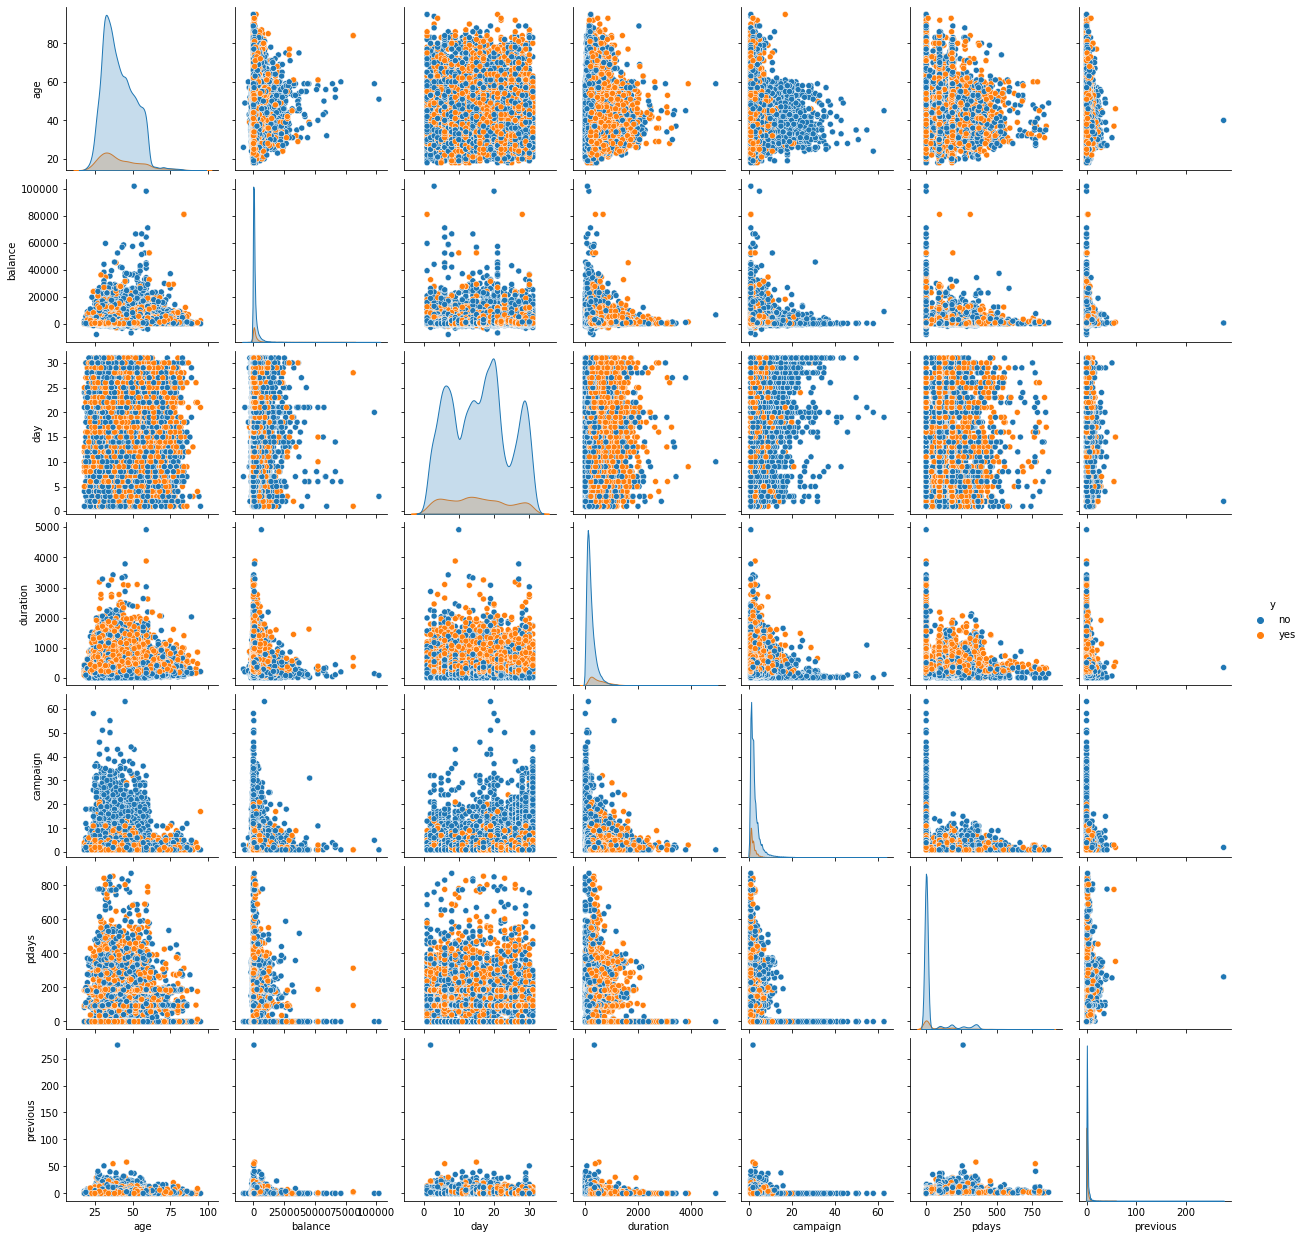

In [8]:
# faça um pairplot com o hue para avaliar a separabilidade dos dados

sns.pairplot(df, hue="y")

In [9]:
# há claramente um outlier na coluna "previous"
# esta coluna é: "number of contacts performed before this campaign and for this client"
# identifique e remova este outlier

df = df[~(df["previous"] > 250)]

In [10]:
# dê uma olhada na distribuição do target

df["y"].value_counts().min()

5289

Há um desbalanço considerável... Como podemos resolver isso?


____
____
_____

## 3) Resampling

Uma técnica muito comum para mitigar problemas de desbaçanceamento de classe é o **undersampling**, que é uma técnica de **resampling** (ou reamostragem).

Este método consiste em criar uma nova amostra **dos dados que estão na classe majoritária**, de modo que o balanço seja alcançado.

<center><img src="https://miro.medium.com/max/335/1*YH_vPYQEDIW0JoUYMeLz_A.png" width=300></center>

Isso faz com que parte dos dados sejam eliminados, o que só é uma boa ideia se houver uma quantidade muito grande de dados para se começar.

In [11]:
def undersample(df, column_name = 'y'):

    # capta o número de instâncias que cada classe vai passar a ter
    # no undersampling, pegando o número de elementos na classe minoritária
    n = df[column_name].value_counts().min()
      
    # cria um novo dataframe com as colunas do df original
    new_df = pd.DataFrame()
    
    # esse loop percorre todos os valores unicos da coluna a ser reamostrada
    for x in df[column_name].unique():
        
        filtered_df = df[df[column_name] == x]
            
        new_df = pd.concat([new_df, filtered_df.sample(n, random_state=42)])
        
    return new_df

# realize o undersampling estratificado
df_resamp = undersample(df,'y')

In [12]:
print("Shape original:", df.shape)
print("Shape após o resample:", df_resamp.shape)

Shape original: (45210, 17)
Shape após o resample: (10578, 17)


In [13]:
df_resamp["y"].value_counts(normalize=False)

no     5289
yes    5289
Name: y, dtype: int64

In [14]:
# redefine o df original
df = df_resamp.copy()

Uma outra técnica similar é o **oversampling**, na qual os dados da classe minoritária são replicados, até que o balanço seja alcançado:

<center><img src="https://miro.medium.com/max/725/0*FeIp1t4uEcW5LmSM.png" width=600></center>

Para mais detalhes sobre estas técnicas, e como fazê-las com uma biblioteca, [clique aqui](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/). Obs.: note que uma estratégia interessante é utilizar ambos o undersampling e o undersampling juntos!

---

## 4) Utilizando dados categóricos

Chegou o momento de aprendermos uma forma de utilizar dados categóricos!

In [15]:
# capture um subdataframe com as colunas que não são numéricas
# dica: df.select_dtypes(exclude=[np.number])

df.select_dtypes(exclude=[np.number])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
9157,blue-collar,married,primary,no,no,no,unknown,jun,unknown,no
33476,blue-collar,married,primary,no,yes,no,cellular,apr,unknown,no
10528,management,married,tertiary,yes,no,no,unknown,jun,unknown,no
21739,retired,married,secondary,no,no,no,cellular,aug,unknown,no
11749,management,single,primary,no,no,no,unknown,jun,unknown,no
...,...,...,...,...,...,...,...,...,...,...
43393,retired,married,secondary,no,no,no,telephone,apr,success,yes
44004,management,single,tertiary,no,yes,no,cellular,jun,success,yes
40339,management,married,tertiary,no,no,no,cellular,jun,unknown,yes
45200,technician,married,secondary,no,yes,no,cellular,nov,unknown,yes


In [16]:
# dê uma olhada nos valores únicos de cada uma das colunas categóricas

for coluna in df.select_dtypes(exclude=[np.number]).columns:
    
    print("Coluna:", coluna)
    
    display(df[coluna].unique().tolist())
    
    print("\n\n")

Coluna: job


['blue-collar',
 'management',
 'retired',
 'services',
 'admin.',
 'technician',
 'self-employed',
 'student',
 'unemployed',
 'housemaid',
 'entrepreneur',
 'unknown']




Coluna: marital


['married', 'single', 'divorced']




Coluna: education


['primary', 'tertiary', 'secondary', 'unknown']




Coluna: default


['no', 'yes']




Coluna: housing


['no', 'yes']




Coluna: loan


['no', 'yes']




Coluna: contact


['unknown', 'cellular', 'telephone']




Coluna: month


['jun',
 'apr',
 'aug',
 'may',
 'jan',
 'jul',
 'nov',
 'feb',
 'sep',
 'mar',
 'dec',
 'oct']




Coluna: poutcome


['unknown', 'failure', 'other', 'success']




Coluna: y


['no', 'yes']

Não há muitos **níveis categóricos**! 

Quando este é o caso, podemos **representar cada categoria como um número!**

Isso faz com que possamos utilizar as colunas com dados categóricos em nosso modelo!

O que vamos fazer é:

- Convertemos a coluna para category (com o método `astype('category')`);
- Utilizamos então os atributos `cat.codes` para criar códigos numéricos que representem as categorias. 

Veremos mais tarde outra forma de fazer este processo, e comparemos os resultados obtidos com cada um dos métodos.

In [17]:
# graças ao dean: como pegar o de-para de categorias e numeros

df["marital"].astype('category').cat.categories[0]

'divorced'

In [18]:
for coluna in df.columns:
    
    # apenas para as colunas do tipo object
    if df[coluna].dtype == object:
        
        # altera a coluna
        df[coluna] = df[coluna].astype('category').cat.codes

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10578 entries, 9157 to 44334
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        10578 non-null  int64
 1   job        10578 non-null  int8 
 2   marital    10578 non-null  int8 
 3   education  10578 non-null  int8 
 4   default    10578 non-null  int8 
 5   balance    10578 non-null  int64
 6   housing    10578 non-null  int8 
 7   loan       10578 non-null  int8 
 8   contact    10578 non-null  int8 
 9   day        10578 non-null  int64
 10  month      10578 non-null  int8 
 11  duration   10578 non-null  int64
 12  campaign   10578 non-null  int64
 13  pdays      10578 non-null  int64
 14  previous   10578 non-null  int64
 15  poutcome   10578 non-null  int8 
 16  y          10578 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 764.4 KB


Agora vamos à modelagem!

_____

In [20]:
# separe as features e o target

X = df.drop(columns="y")

y = df["y"]

In [21]:
# faça os passos de 1 a 7!

# atenção especial para o passo 2 e os hiperparâmetros!

In [22]:
X = df.drop(columns="y")
y = df["y"]

from sklearn.tree import DecisionTreeClassifier

estimador = DecisionTreeClassifier()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
modelo = estimador.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1783
           1       0.78      0.79      0.78      1708

    accuracy                           0.79      3491
   macro avg       0.79      0.79      0.79      3491
weighted avg       0.79      0.79      0.79      3491



_____

É possível melhorar o primeiro modelo que fizemos?

Vamos mudar a abordagem de uso de variáveis categóricas...

### One-hot encoding

Outra forma extremamente comum de utilizar variáveis categóricas é através da criação de **variáveis mudas** (dummy variables)

<center><img src="https://miro.medium.com/max/2474/1*ggtP4a5YaRx6l09KQaYOnw.png" width=700></center>

Isso é facilmente feito com o pandas utilizando a função [pd.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [23]:
# restaurando o df com as features categóricas originais
df = df_resamp.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9157,40,blue-collar,married,primary,no,743,no,no,unknown,5,jun,18,2,-1,0,unknown,no
33476,44,blue-collar,married,primary,no,135,yes,no,cellular,20,apr,255,1,-1,0,unknown,no
10528,39,management,married,tertiary,yes,47,no,no,unknown,16,jun,84,3,-1,0,unknown,no
21739,57,retired,married,secondary,no,81,no,no,cellular,19,aug,118,3,-1,0,unknown,no
11749,43,management,single,primary,no,0,no,no,unknown,20,jun,280,1,-1,0,unknown,no


In [24]:
pd.get_dummies(df)[["y_yes", "y_no"]]

,y_yes,y_no
9157,0,1
33476,0,1
10528,0,1
21739,0,1
11749,0,1
...,...,...
43393,1,0
44004,1,0
40339,1,0
45200,1,0


Mas note que há uma redundância nas colunas!

Pra resolver isso, podemos utilizar o argumento drop_first=True:

In [25]:
df = pd.get_dummies(df, drop_first=True)

In [26]:
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
9157,40,743,5,18,2,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
33476,44,135,20,255,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
10528,39,47,16,84,3,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
21739,57,81,19,118,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11749,43,0,20,280,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43393,84,81204,1,390,1,94,3,0,0,0,...,0,0,0,0,0,0,0,1,0,1
44004,47,334,28,614,3,94,9,0,0,0,...,1,0,0,0,0,0,0,1,0,1
40339,34,443,18,235,3,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
45200,38,557,16,1556,4,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [27]:
# refaça todas as etapas (desde definição de X e y até a avaliação do modelo)

X = df.drop(columns="y_yes")
y = df["y_yes"]

from sklearn.tree import DecisionTreeClassifier

estimador = DecisionTreeClassifier()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
modelo = estimador.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))

Matriz de confusão do modelo nos dados de teste:

[[1443  340]
 [ 379 1329]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1783
           1       0.80      0.78      0.79      1708

    accuracy                           0.79      3491
   macro avg       0.79      0.79      0.79      3491
weighted avg       0.79      0.79      0.79      3491



_____

Ainda dá pra melhorar?

Utilize o gridsearch!

Neste, começamos com os **dados originais** e usamos o [OneHotScaler do sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) como parte do pipeline!

Obs.: para aplicar o encoder apenas às features categóricas, temos que usar também o [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [29]:
X.select_dtypes(exclude=[np.number]).columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [31]:
df = df_resamp.copy()

X = df.drop(columns='y')
y = df['y']

# redefinir pra poder alterar novamente
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

###########################################################################

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# apenas as colunas com features categóricas
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_transformer = Pipeline([('onehot', OneHotEncoder(drop="first"))])

preprocessor = ColumnTransformer(transformers=[('cat', 
                                                categorical_transformer, 
                                                categorical_features)], 
                                 remainder='passthrough')

pipe = Pipeline([('preprocessor', preprocessor),
                 ('dt', DecisionTreeClassifier())])


from sklearn.model_selection import GridSearchCV

param_grid = {'dt__criterion' : ["gini", "entropy"],
              'dt__splitter' : ['best', 'random'],
              'dt__min_samples_split' : range(4, 8),
              'dt__min_samples_leaf' : range(4, 8)}

grid = GridSearchCV(pipe, param_grid, scoring="f1_weighted", cv=5)

modelo = grid.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

###########################################################################

from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))

Matriz de confusão do modelo nos dados de teste:

[[1453  330]
 [ 300 1408]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

          no       0.83      0.81      0.82      1783
         yes       0.81      0.82      0.82      1708

    accuracy                           0.82      3491
   macro avg       0.82      0.82      0.82      3491
weighted avg       0.82      0.82      0.82      3491



In [32]:
grid.best_params_

{'dt__criterion': 'gini',
 'dt__min_samples_leaf': 7,
 'dt__min_samples_split': 4,
 'dt__splitter': 'random'}

Uma outra forma de buscar por hiperparâmetros é através **de uma busca aleatória**, o que pode ser feito através do [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

A diferença entre este buscador e o GridSearch, é que neste caso não explicitamos a lista com os valores dos hiperparâmetros a sere, combinados, mas passamos **os valores possíveis dos hiperparâmetros, que são amostrados aleatoriamente de modo a gerar combinações aleatórias!** Aí, ao invés de tentarmos todas as combinações possíveis, testamos apenas **um número determinado de combinações aleatoriamente amostradas das distribuições!**

Para mais informações sobre este método, [clique aqui!](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search).

[Veja aqui](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html) uma comparação entre os dois métodos.

Em algumas situações, pode ser que a busca aleatória seja mais eficiente que o grid search, dado seu caráter aleatório!

In [33]:
df = df_resamp.copy()

X = df.drop('y', axis=1)
y = df['y']

# redefinir pra poder alterar novamente
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

###########################################################################

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# apenas as colunas com features categóricas
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_transformer = Pipeline([('onehot', OneHotEncoder(drop="first"))])

preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)], 
                                 remainder='passthrough')

pipe = Pipeline([('preprocessor', preprocessor),
                 ('dt', DecisionTreeClassifier())])


from sklearn.model_selection import RandomizedSearchCV
import scipy

param_distributions = {'dt__criterion' : ["gini", "entropy"],
                      'dt__splitter' : ['best', 'random'],
                      'dt__min_samples_split' : scipy.stats.randint(1, 50),
                      'dt__min_samples_leaf' : scipy.stats.randint(1, 50)}

grid = RandomizedSearchCV(pipe, param_distributions, scoring="f1_weighted", cv=5, n_iter=20)

modelo = grid.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

###########################################################################

from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))

Matriz de confusão do modelo nos dados de teste:

[[1459  324]
 [ 292 1416]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

          no       0.83      0.82      0.83      1783
         yes       0.81      0.83      0.82      1708

    accuracy                           0.82      3491
   macro avg       0.82      0.82      0.82      3491
weighted avg       0.82      0.82      0.82      3491



In [35]:
grid.best_params_

{'dt__criterion': 'gini',
 'dt__min_samples_leaf': 6,
 'dt__min_samples_split': 49,
 'dt__splitter': 'random'}

_______

__Visualizando a árvore de decisão__

É possível visualizar a árvore de decisão criada com o próprio sklearn!

Para isso, basta usar a função `plot_tree()` do sub-módulo tree, conforme abaixo!

Para mais detalhes sobre como plotar a árvore, [clique aqui](https://scikit-learn.org/stable/modules/tree.html#tree)

In [36]:
df = df_resamp.copy()

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns="y_yes")
y = df["y_yes"]

from sklearn.tree import DecisionTreeClassifier

estimador = DecisionTreeClassifier(max_depth=3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
modelo = estimador.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1783
           1       0.74      0.87      0.80      1708

    accuracy                           0.78      3491
   macro avg       0.79      0.79      0.78      3491
weighted avg       0.80      0.78      0.78      3491



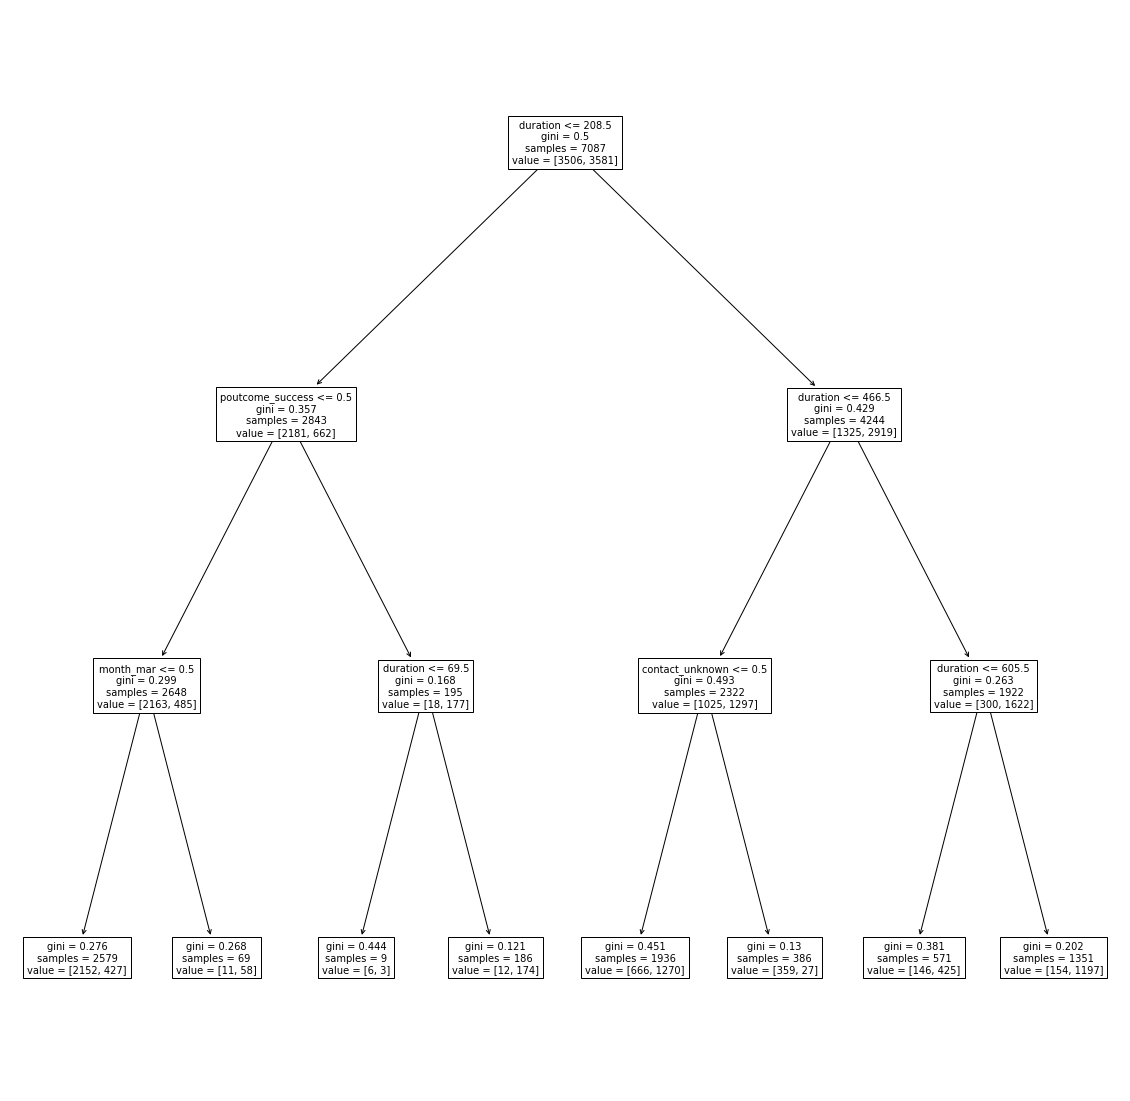

In [37]:
from sklearn import tree

plt.figure(figsize=(20, 20))
tree.plot_tree(modelo, feature_names=X_train.columns)
plt.show()